In [2]:

#Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
import os

In [5]:
os.chdir('E:\\01_2019_DS\\Datasets\\')
print(os.getcwd())

E:\01_2019_DS\Datasets


In [8]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [10]:
# Creating a data structure with 60 timesteps and 1 output
# ie v r training on the last 60 days
# and predicting the next timestamp/days value
# When v tried with 1 ts the model was overfitting
# With 30,40,50 timestamps v did not get a good model
# as it wsa not capturing the model
# the best was 60 financial days
# ie 3 months as ea month has 20 financial days

In [11]:
X_train = [] #60 prev stock prices before the financial day
				# this is the ip to the RNN

In [12]:
y_train = []  # will contain the stock price the next fin day
				# this is the op 

In [13]:
# since v need 60 prev days to start predicting frm 61st day v r starting at 60 ie 61
for i in range(60, 1258): # upper bound is last row, lower bound is i-60
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)
print("#********************")
print(y_train)


[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
#********************
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [14]:
print(X_train.shape[0])



1198
60


In [15]:
print(X_train.shape[1])

60


In [16]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [17]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [18]:
# Initialising the RNN
regressor = Sequential()


In [19]:
# Adding the first LSTM layer and some Dropout regularisation
# for preventing overfitting
# this is the first lstm layer
# v want v high dimensionality
# v will start with 50 but v can increase it as much as v desire
# capturing trend in stock time series is v complex
# v can also choose 3 to 5 neruons but it will not b able to 
# capture the trend
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))


In [20]:
# 50 is the num of neurons or cells
# True for stacked lstm, v r adding another layer of lstm
# on top of it
# inp_shape
regressor.add(Dropout(0.2))

In [21]:
# 20% of 50 is 10, 10 neurons will b droppd 
# ie 20% of ns will b ignord dur training
# ie dur frward & bw prop
# during ea iteration 


# Adding a second LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [22]:
# Adding the output layer
regressor.add(Dense(units = 1))
# 1 is the dimension of the op layer
# ie 1 neruon


In [24]:
 #Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [25]:
# Fitting the RNN to the Training set
#regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 3s 89ms/step - loss: 0.0514
Epoch 2/10
38/38 [==============================] - 6s 167ms/step - loss: 0.0055
Epoch 3/10
38/38 [==============================] - 6s 159ms/step - loss: 0.0047
Epoch 4/10
38/38 [==============================] - 5s 141ms/step - loss: 0.0042
Epoch 5/10
38/38 [==============================] - 6s 158ms/step - loss: 0.0039
Epoch 6/10
38/38 [==============================] - 6s 151ms/step - loss: 0.0043
Epoch 7/10
38/38 [==============================] - 6s 151ms/step - loss: 0.0040
Epoch 8/10
38/38 [==============================] - 6s 164ms/step - loss: 0.0038
Epoch 9/10
38/38 [==============================] - 5s 145ms/step - loss: 0.0035 0s - loss: 0.0
Epoch 10/10
38/38 [==============================] - 5s 140ms/step - loss: 0.0032 0s - l


In [26]:
# every 32 stock prices back prop is going to happn


In [27]:
regressor = Sequential()


In [28]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))



In [29]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))



In [30]:
# Adding a third LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [31]:
# Adding the output layer
regressor.add(Dense(units = 1))


In [32]:

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')



In [33]:
# Fitting the RNN to the Training set
#regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 7s 185ms/step - loss: 0.0311
Epoch 2/10
38/38 [==============================] - 8s 200ms/step - loss: 0.0057
Epoch 3/10
38/38 [==============================] - 9s 232ms/step - loss: 0.0052
Epoch 4/10
38/38 [==============================] - 7s 197ms/step - loss: 0.0046
Epoch 5/10
38/38 [==============================] - 7s 194ms/step - loss: 0.0048
Epoch 6/10
38/38 [==============================] - 8s 218ms/step - loss: 0.0046
Epoch 7/10
38/38 [==============================] - 7s 195ms/step - loss: 0.0041
Epoch 8/10
38/38 [==============================] - 9s 234ms/step - loss: 0.0042
Epoch 9/10
38/38 [==============================] - 7s 192ms/step - loss: 0.0041
Epoch 10/10
38/38 [==============================] - 8s 205ms/step - loss: 0.0038


In [34]:

regressor = Sequential()



In [35]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))



In [36]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))



In [37]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))



In [38]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))



In [39]:
# Adding the output layer
regressor.add(Dense(units = 1))



In [40]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')



In [41]:
# Fitting the RNN to the Training set
#regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 8s 218ms/step - loss: 0.0520
Epoch 2/10
38/38 [==============================] - 10s 264ms/step - loss: 0.0062
Epoch 3/10
38/38 [==============================] - 8s 217ms/step - loss: 0.0055
Epoch 4/10
38/38 [==============================] - 9s 245ms/step - loss: 0.0053
Epoch 5/10
38/38 [==============================] - 10s 267ms/step - loss: 0.0048
Epoch 6/10
38/38 [==============================] - 9s 228ms/step - loss: 0.0047
Epoch 7/10
38/38 [==============================] - 11s 278ms/step - loss: 0.0044
Epoch 8/10
38/38 [==============================] - 10s 256ms/step - loss: 0.0052
Epoch 9/10
38/38 [==============================] - 8s 215ms/step - loss: 0.0047
Epoch 10/10
38/38 [==============================] - 10s 265ms/step - loss: 0.0047


In [44]:
# Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values



In [48]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [51]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


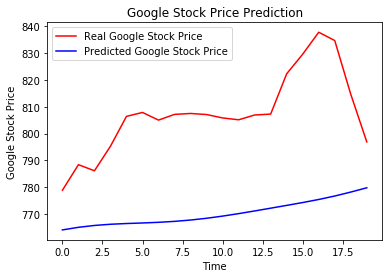

In [52]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
